In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

7.823750167229015


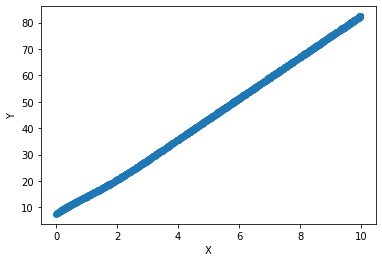

In [2]:
a= 10*np.random.rand()
b= 10*np.random.rand()
print(a)
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
x = np.random.uniform(0,10,1000)
y =  a*x + b + normal_dist(x,0,1)
plt.plot(x,y,'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
def h(x,theta):
    return x@theta.T

def cost_function(x,y,theta):
    m = len(x)
    J = (1/(2*m))*np.sum((h(x,theta)-y)**2)
    return J

def gradient_descent(x,y,theta,learn_rate,epochs):
    m = len(x)
    J_all=[]
    epochs1=[]
    for i in range(epochs):
        z= (x.T)@(h(x,theta)-y)
        z= z.T
        theta = theta - (learn_rate/m)*z
        J_all.append(cost_function(x,y,theta))
        epochs1.append(i)
    plt.plot(epochs1,J_all)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    return theta

In [4]:
def cost_function_ridge(x,y,theta,lamda):
    m = len(x)
    J = (1/(2*m))*np.sum((h(x,theta)-y)**2) + (lamda/(2*m))*np.sum(theta**2)
    return J

def gradient_descent_ridge(x,y,theta,learn_rate,epochs,lamda):
    m = len(x)
    J_all=[]
    epochs1=[]
    for i in range(epochs):
        z= (x.T)@(h(x,theta)-y) + lamda*theta
        z= z.T
        theta = theta - (learn_rate/m)*z
        theta[0]=theta[0]+lamda*theta[0]*(learn_rate)/m
        J_all.append(cost_function(x,y,theta))
        epochs1.append(i)
    plt.plot(epochs1,J_all)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    return theta
	



In [5]:
def cost_function_lasso(x,y,theta,lamda):
    m = len(x)
    J = (1/(2*m))*np.sum((h(x,theta)-y)**2) + (lamda/(2*m))*np.sum(np.abs(theta))
    return J

def gradient_descent_lasso(x,y,theta,learn_rate,epochs,lamda):
    m = len(x)
    J_all=[]
    epochs1=[]
    for i in range(epochs):
        z= (x.T)@(h(x,theta)-y) + lamda*np.sign(theta)
        z= z.T
        theta = theta - (learn_rate/m)*z
        theta[0]=theta[0]+lamda*np.sign(theta[0])*(learn_rate)/m
        J_all.append(cost_function(x,y,theta))
        epochs1.append(i)
    plt.plot(epochs1,J_all)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    return theta

In [6]:
def cost_function_elastic(x,y,theta,lamda):
    m = len(x)
    J = (1/(2*m))*np.sum((h(x,theta)-y)**2) + (lamda/(2*m))*np.sum(np.abs(theta)) + ((lamda/(2*m))*np.sum(theta**2))
    return J

def gradient_descent_elastic(x,y,theta,learn_rate,epochs,lamda):
    m = len(x)
    J_all=[]
    epochs1=[]
    for i in range(epochs):
        z= (x.T)@(h(x,theta)-y) + lamda*np.sign(theta) + lamda*theta
        z= z.T
        theta = theta - (learn_rate/m)*z
        theta[0]=theta[0]+lamda*np.sign(theta[0])*(learn_rate)/m + lamda*theta[0]*(learn_rate)/m
        J_all.append(cost_function(x,y,theta))
        epochs1.append(i)
    plt.plot(epochs1,J_all)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    return theta

In [7]:
def create_points(degree,x):
    points = []
    for i in range(degree+1):
        points.append(x**i)
    return points

In [8]:
degree =10
X_data = create_points(degree,x)
X_data = np.array(X_data).T
Y_data = y
theta = 10*abs((np.random.randn(degree+1)))
X_data = (X_data-np.mean(X_data))/np.std(X_data)
Y_data = (Y_data - np.mean(Y_data))/np.std(Y_data)
X_data, X_test, Y_data, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

Without Regularisation

The value of cost function without regularization:  1.1910530467557303


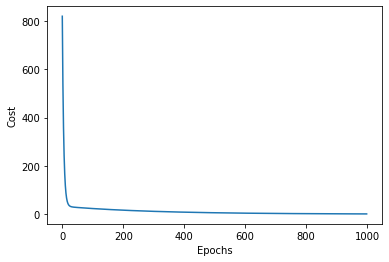

In [9]:
theta_new = gradient_descent(X_data,Y_data,theta,0.01,1000)
total_loss = cost_function(X_test,Y_test,theta_new)
print("The value of cost function without regularization: ",total_loss)

RIDGE REGULARISATION

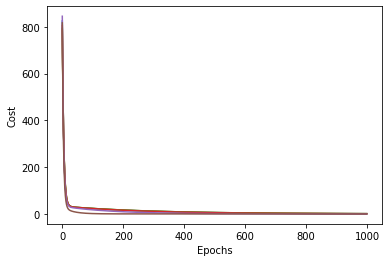

In [10]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = gradient_descent_ridge(train_x,train_y,theta,0.01,1000, lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(cost_function(test_x,test_y,theta_new))

In [11]:
total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)

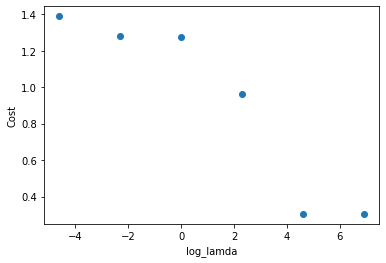

The best lamda for ridge regularization :  1000.0


In [12]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for ridge regularization : ", best_lamda)

The value of cost function after using ridge regulariation :  0.3056631164942969


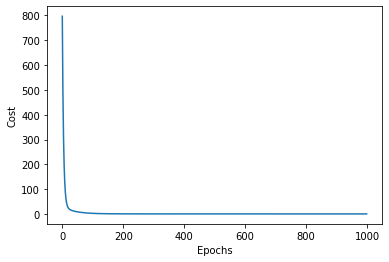

In [13]:
## Implementing the model after finding the best lamda
theta_best = gradient_descent_ridge(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using ridge regulariation : ",cost_function(X_test,Y_test,theta_best))

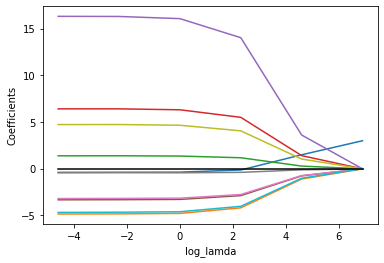

In [14]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

LASSO REGULARIZATION

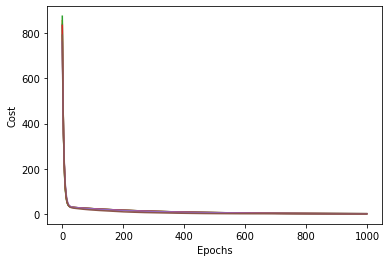

In [15]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = gradient_descent_lasso(train_x,train_y,theta,0.01,1000, lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(cost_function(test_x,test_y,theta_new))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)



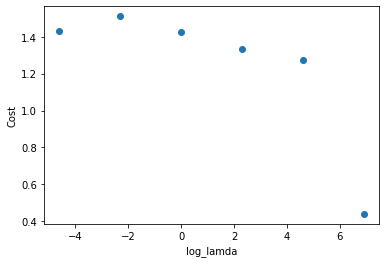

The best lamda for lasso regularization :  1000.0


In [16]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for lasso regularization : ", best_lamda)

The value of cost function after using lasso regulariation :  0.48390519028500145



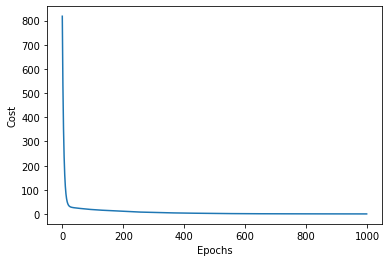

In [17]:
## Implementing the model after finding the best lamda
theta_best = gradient_descent_lasso(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using lasso regulariation : ",cost_function(X_test,Y_test,theta_best))
print()

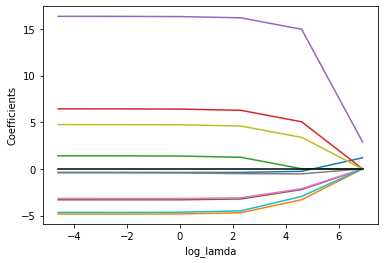

In [18]:
theta_all =theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()

ELASTIC REGULARIZATION

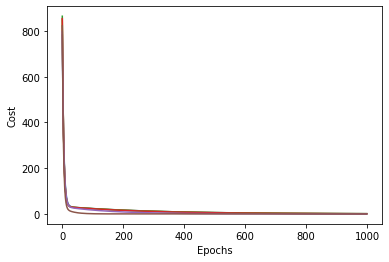

In [19]:
k = 6
lamda_values = np.array([0.01,0.1,1,10,100,1000])
theta_values = np.zeros(degree+1)
total_cost=[]
theta_all= np.zeros([k,degree+1])
for i in range(k):
    lamda = lamda_values[i]
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=1/k)
    theta_new = gradient_descent_elastic(train_x,train_y,theta,0.01,1000, lamda)
    theta_all[i]=theta_new
    theta_values = theta_values + theta_new/k
    total_cost.append(cost_function(test_x,test_y,theta_new))

total_cost = np.array(total_cost)
log_lamda = []
for i in range(k):
    log_lamda.append(np.log(lamda_values[i]))
log_lamda=np.array(log_lamda)


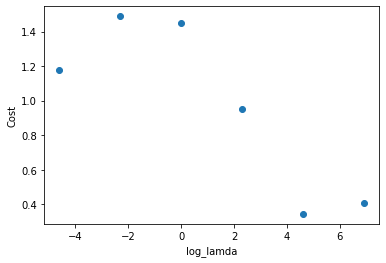

The best lamda for elastic regularization :  100.0


In [20]:
plt.plot(log_lamda,total_cost,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=total_cost[0]
best_lamda=lamda_values[0]
for i in range(1,k):
    if total_cost[i]<min_loss:
        min_loss=total_cost[i]
        best_lamda=lamda_values[i]
print("The best lamda for elastic regularization : ", best_lamda)

The value of cost function after using elastic regulariation :  0.358547928613636


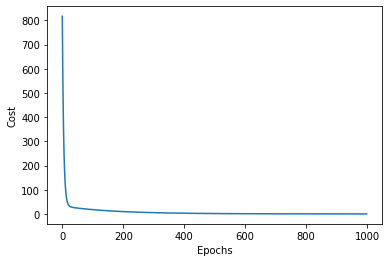

In [21]:
## Implementing the model after finding the best lamda
theta_best = gradient_descent_elastic(X_data,Y_data,theta,0.01,1000, best_lamda)
print("The value of cost function after using elastic regulariation : ",cost_function(X_test,Y_test,theta_best))

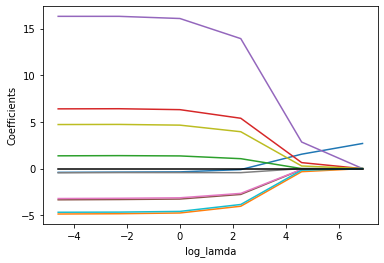

In [22]:
theta_all=theta_all.T
for i in range(10):
    plt.plot(log_lamda, np.array(theta_all[i]), linestyle='solid')
plt.plot(log_lamda,np.zeros(6),'black')
plt.xlabel("log_lamda")
plt.ylabel("Coefficients")
plt.show()
